In [1]:
import networkx as nx

In [2]:
graph = nx.Graph()
graph.add_edge("#Industry","#Jobs",{"direction":'+VS'}) #AR1
graph.add_edge("#Jobs","#Citizens",{"direction":'+S'}) #AR2
graph.add_edge("#Citizens","Urbanization",{"direction":'+S'}) #AR3
graph.add_edge("#Citizens","Tax_Revenue",{"direction":'+S'}) #AR4
graph.add_edge("Tax_Revenue","City_Budget",{"direction":'+VS'}) #AR4
graph.add_edge("School_Funding","Citizens_Satisfaction",{"direction":'+M'}) #AR7
graph.add_edge("#Citizens","House_Market",{"direction":'+S'}) #AR8
graph.add_edge("House_Market","House_Prices",{"direction":'+VS'}) #AR9
graph.add_edge("House_Prices","Cost_of_Life",{"direction":'+VS'}) #AR10
graph.add_edge("Cost_of_Life","Citizens_Satisfaction",{"direction":'-VS'}) #AR11
graph.add_edge("Urbanization","Green_Spaces",{"direction":'-S'}) #AR12
graph.add_edge("Green_Spaces","Citizens_Satisfaction",{"direction":'+S'}) #AR13
graph.add_edge("Economical_Growth","#Industry",{"direction":'+S'}) #AR14
#additional edges and nodes included
graph.add_edge("#Industry","Urbanization",{"direction":'+S'})  #more industries means more urbanized city
#graph.add_edge("School_Funding","Tax_Revenue",{"direction":+L})  REMOVED
graph.add_edge("Economical_Growth","#Jobs",{"direction":'+M'})    #the more the economy is developed in a city, the more jobs it's gonna offer for the citizens
graph.add_edge("Urbanization","#Public_Services",{"direction":'+S'})  #Urbanization bring with it the need of new hospitals, police department, firefighter etc
graph.add_edge("#Public_Services","#Jobs",{"direction":'+S'})  #the more public service structures, the more jobs will be available
graph.add_edge("Citizens_Satisfaction","Work_Productivity",{"direction":'+VL'})   #A happy and satisfied citizen will be more productive at work
graph.add_edge("Work_Productivity","Economical_Growth",{"direction":'+L'})      #A more productive worker will perform more work in the same time, bringing 
graph.add_edge("Economical_Growth","Income_Inequality",{"direction":'+VS'})      #An economical growth of the city will increase the Income inequality between cityizens
graph.add_edge("Income_Inequality","Citizens_Satisfaction",{"direction":'-VS'})   #Income Inequality will decrease the citizens satisfaction
#add for impact on existing residents
graph.add_edge("#Citizens","Overpopulation",{"direction":'+S'})
graph.add_edge("#Overpopulation","Unemployment",{"direction":'+VS'})
graph.add_edge("Unemployment","Crime",{"direction":'+S'})
graph.add_edge("Unemployment","Homelessness",{"direction":'+S'})
graph.add_edge("Unemployment","Citizens_Satisfaction",{"direction":'-M'})
graph.add_edge("Homelessness","City_Budget",{"direction":'-S'})
graph.add_edge("Homelessness","Citizens_Satisfaction",{"direction":'-S'})
graph.add_edge("Crime","#Public_Services",{"direction":'-M'})
graph.add_edge("City_Budget","School_Funding",{"direction":'+M'})
graph.add_edge("City_Budget","Economical_Growth",{"direction":'+M'})
graph.add_edge("Crime","Citizens_Satisfaction",{"direction":'+VS'})
#from impact on existing Businesses
graph.add_edge("Overpopulation","#Commuters",{"direction":'+S'})
graph.add_edge("#Commuters","Traffic",{"direction":'+S'})
graph.add_edge("Traffic","Pollution",{"direction":'+VS'})
graph.add_edge("Pollution","Citizens_Satisfaction",{"direction":'-M'})
graph.add_edge("Urbanization","Pollution",{"direction":'+VS'})
graph.add_edge("#Industry","Pollution",{"direction":'+M'})
graph.add_edge("Traffic","Street_Infrastructure",{"direction":'+S'})
graph.add_edge("Street_Infrastructure","City_Budget",{"direction":'-S'})
graph.add_edge("Street_Infrastructure","Taxes",{"direction":'+M'})
graph.add_edge("Street_Infrastructure","Green_Spaces",{"direction":'-VS'})
graph.add_edge("Green_Spaces","Floodings",{"direction":'-S'})
graph.add_edge("Floodings","Citizens_Satisfaction",{"direction":'-S'})
graph.add_edge("Floodings","City_Budget",{"direction":'-S'})
graph.add_edge("Floodings","Taxes",{"direction":'+S'})
graph.add_edge("House_Prices","#Commuters",{"direction":'+S'})
graph.add_edge("Taxes","Tax_Revenue",{"direction":'+VS'})
graph.add_edge("Taxes","Citizens_Satisfaction",{"direction":'-S'})
graph.add_edge("Traffic","Citizens_Satisfaction",{"direction":'-M'})
graph.add_edge("House_Prices","Homelessness",{"direction":'+S'})

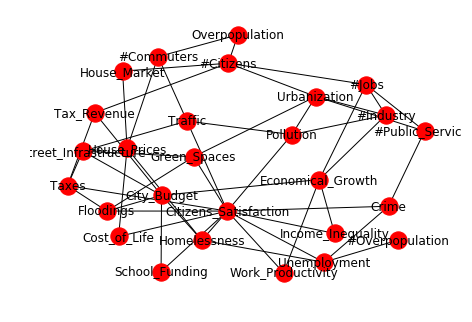

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
nx.draw(graph,with_labels = True)

In [4]:
f=open("z1840898_map3.csv","w")
for edge in graph.edges():
    f.write(edge[0]+','+edge[1]+','+graph.edge[edge[0]][edge[1]]['direction']+'\n')
f.close()

In [5]:
import operator
katz=nx.katz_centrality(graph)
nx.set_node_attributes(graph,'katz',katz)
import matplotlib.pyplot as plt

In [6]:
def draw(G,measure_name,position):
    
    #sort the attributes by their value of centrality
    temp=sorted(nx.get_node_attributes(G,measure_name).items(),  key=lambda elem:elem[1])
    
    #as recommended after meeting in the office,I've ranked each element in the list by one,in orded or lower to higher
    #centrality. 
    nodes = nx.draw_networkx_nodes(G, node_size=250, cmap=plt.cm.plasma,pos=position,
                                  nodelist=[x[0] for x in temp],
                                  node_color=list(range(len(temp))) 
                                  #create a list starting from zero up to the total number of elements, 
                                  #each element color will be incremented by one
                                  )

    edges = nx.draw_networkx_edges(G, position)
    labels = nx.draw_networkx_labels(G, position)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

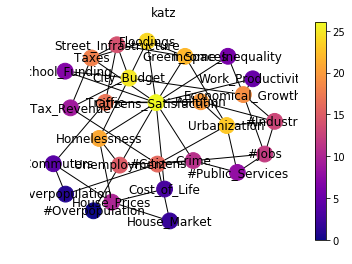

In [7]:
draw(graph,'katz',nx.spring_layout(graph))


In [8]:
sorted(nx.get_node_attributes(graph,'katz').items(),  key=lambda elem:elem[1],reverse=True)

[('Citizens_Satisfaction', 0.3361151265683031),
 ('City_Budget', 0.22537262710718728),
 ('Floodings', 0.20733135073908007),
 ('Urbanization', 0.20693663684520397),
 ('Green_Spaces', 0.20494627400247578),
 ('Homelessness', 0.2040680075933539),
 ('Pollution', 0.2039234342994535),
 ('Economical_Growth', 0.20367845415614777),
 ('Taxes', 0.20154123377228517),
 ('Traffic', 0.20021476422647486),
 ('#Citizens', 0.19660959064638103),
 ('Unemployment', 0.1956114998142259),
 ('Street_Infrastructure', 0.19374133096625254),
 ('#Industry', 0.19062946139506848),
 ('#Jobs', 0.186417528456122),
 ('Crime', 0.18049842410694156),
 ('House_Prices', 0.17824247681687203),
 ('Tax_Revenue', 0.17288620639527275),
 ('#Public_Services', 0.16791912742544757),
 ('School_Funding', 0.16668262726858885),
 ('Work_Productivity', 0.16451321430838411),
 ('Income_Inequality', 0.16451321430838411),
 ('#Commuters', 0.16302937649026814),
 ('Cost_of_Life', 0.16196962038944215),
 ('House_Market', 0.14801908949016182),
 ('Overpo